In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
df= pd.read_csv('C:/Users/Geetha Jayaraj/Desktop/shyamkrishna-desktop/college work/ML Miniproject/car data.csv')
df.shape, df.columns, df.dtypes

((301, 9),
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
        'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
       dtype='object'),
 Car_Name          object
 Year               int64
 Selling_Price    float64
 Present_Price    float64
 Kms_Driven         int64
 Fuel_Type         object
 Seller_Type       object
 Transmission      object
 Owner              int64
 dtype: object)

In [3]:
df.isna().sum() #isna() shows null/NaN value; sum() will give all of isna()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
#Filter Dataset and add column with Current year
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
final_dataset['Current Year']=2021
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [5]:
# Add new column with Age of vehicle
final_dataset['Age']=final_dataset['Current Year']- final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [6]:
# Convert categorical columns with get_dummies
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

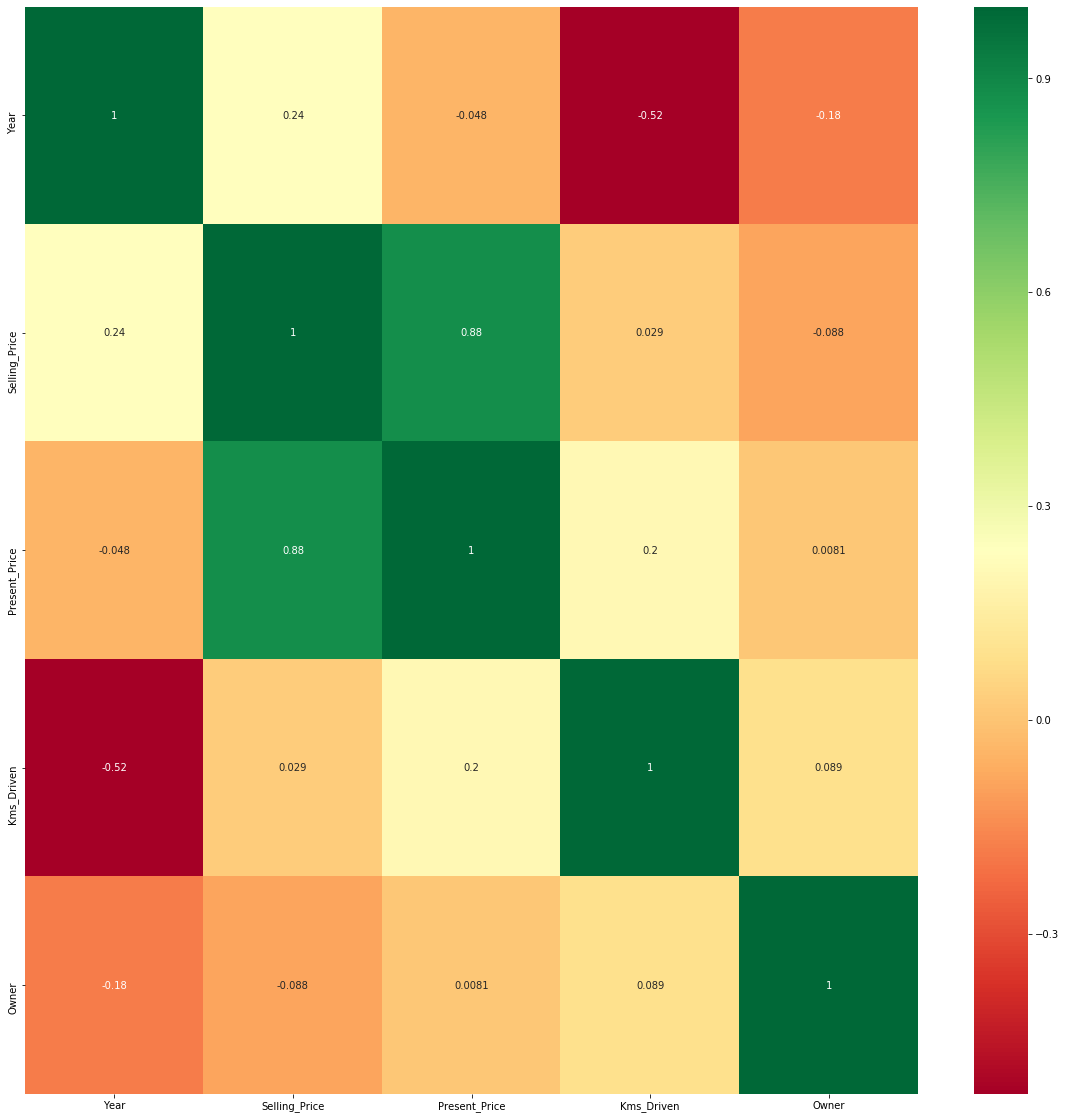

In [7]:
#get correlations of each features in dataset
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
final_dataset.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Current Year', 'Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [9]:
# Set up x and y(target) data
y=final_dataset['Selling_Price']
x= final_dataset[['Present_Price', 'Kms_Driven', 'Owner', 'Age','Fuel_Type_Diesel', 
                 'Fuel_Type_Petrol', 'Seller_Type_Individual','Transmission_Manual']]

In [10]:
# Split the dataset with train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=20)

In [11]:
# Define model for decision tree
import sklearn.metrics as sm
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [12]:
# Fit the model with best params
dt= DecisionTreeRegressor(random_state=20)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=20, splitter='best')

In [13]:
# make Predictions
predictions=dt.predict(X_test)

In [14]:
#Determine Accuracy
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 0.7180 degrees.
Accuracy = 81.04%.


In [15]:
#r2 score
y_pred_train = dt.predict(X_train)# storing predicted values of (x_train) in an array for later use
#y_pred_train

In [16]:
# evaluation metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_pred_train), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train, y_pred_train), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_train, y_pred_train), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train, y_pred_train), 2)) 
print("R2 score =", round(sm.r2_score(y_train, y_pred_train), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


In [17]:
y_pred_test = dt.predict(X_test)

# evaluation metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_test), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_test), 2))

Mean absolute error = 0.72
Mean squared error = 1.39
Median absolute error = 0.35
Explain variance score = 0.95
R2 score = 0.95
